In [ ]:
info = {
 "title": "Snowflake",
 "author": "Alex Carney",
 "github_username": "alcarney",
 "stylo_version": "0.9.0",
 "dimensions": (1080, 1080)
}

In [1]:
import numpy as np
from math import pi

from stylo.domain.transform import translate, rotate
from stylo.color import FillColor
from stylo.shape import Shape, Circle, Ellipse, Square, Triangle, Line
from stylo.image import LayeredImage

In [2]:
black = FillColor("ffffff")

In [3]:
def circle(r, ts):
    return [(r*np.cos(t*pi + pi/2), r*np.sin(t*pi + pi/2) - 0.1, t*pi) for t in ts]

ts = np.linspace(0, 2, 6)

In [4]:
class FixedLine(Shape):
    
    def __init__(self, length=1, angle=0, pt=0.02):
        self.length = length
        self.angle = angle
        self.pt = pt
        
    def draw(self):
        
        l1 = Line((0,0), (self.length, 0), pt=self.pt)
        
        def line(x, y):
            
            rx = np.cos(self.angle)*x - np.sin(self.angle)*y
            ry = np.sin(self.angle)*x + np.cos(self.angle)*y
            
            return l1(x=rx, y=ry)
        return line
    
class HollowTri(Shape):
    
    def __init__(self, a, b, c, pt=0.02):
        self.a = a
        self.b = b
        self.c = c
        self.pt = pt
        
    def draw(self):
        
        a, b, c = self.a, self.b, self.c
        pt = self.pt
        
        t1 = Triangle(a, b, c)
        t2 = Triangle((a[0] - pt, a[1] - pt), (b[0] - pt, b[1] - pt), (c[0] - pt, c[1] - pt))
        
        def tri(x, y):
            
            mask = t2(x=x, y=y)
            shape = t1(x=x, y=y)
            
            return np.logical_and(shape, np.logical_not(mask))
        
        return tri
            

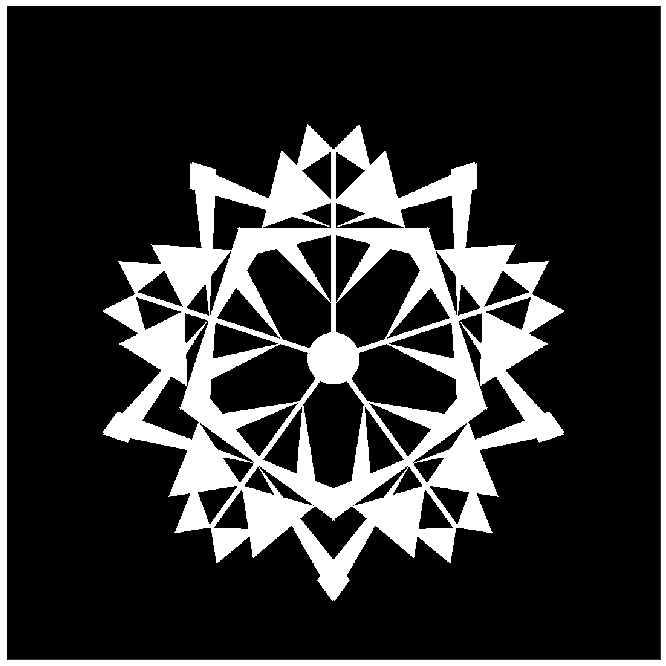

In [5]:
image = LayeredImage(scale=2.5, background="000000")

center = Circle(y=-0.1, r=0.1, fill=True)

image.add_layer(center, black)

for x, y, t in circle(0.2, ts):
    tri = Triangle((-0.25, 0.25), (-0.15, 0.25), (0, 0)) >> rotate(-t) >> translate(x, y)
    tri2 = Triangle((0.25, 0.25), (0.15, 0.25), (0, 0)) >> rotate(-t) >> translate(x, y)
    
    line = FixedLine(0.8, angle=t - pi/2, pt=0.01) >> translate(0, -0.1)   
    
    image.add_layer(tri, black)  
    image.add_layer(tri2, black)
    image.add_layer(line, black)
    

for x, y, t in circle(0.5, ts):

    tri = Triangle((-0.37, 0), (-0.3, -0.1), (0.1, 0)) >> rotate(-t) >> translate(x, y)
    tri2 = Triangle((0.37, 0), (0.3, -0.1), (-0.1, 0)) >> rotate(-t) >> translate(x, y)
        
    image.add_layer(tri, black)  
    image.add_layer(tri2, black)
    
            
for x, y, t in circle(0.5, ts):
    tri = Triangle((-0.55, 0.25), (-0.55, 0.15), (0, 0)) >> rotate(-t) >> translate(x, y)
    tri2 = Triangle((0.55, 0.25), (0.55, 0.15), (0, 0)) >> rotate(-t) >> translate(x, y)
        
    image.add_layer(tri, black)  
    image.add_layer(tri2, black)
    
        
for x, y, t in circle(0.6, ts):
    tri = Triangle((-0.275, -0.1), (-0.2, 0.2), (0, 0)) >> rotate(-t) >> translate(x, y)
    tri2 = Triangle((0.275, -0.1), (0.2, 0.2), (0, 0)) >> rotate(-t) >> translate(x, y)
        
    image.add_layer(tri, black)  
    image.add_layer(tri2, black)
    
            
for x, y, t in circle(0.8, ts):
    tri = Triangle((-0.15, -0.1), (-0.1, 0.1), (0, 0)) >> rotate(-t) >> translate(x, y)
    tri2 = Triangle((0.15, -0.1), (0.1, 0.1), (0, 0)) >> rotate(-t) >> translate(x, y)
        
    image.add_layer(tri, black)  
    image.add_layer(tri2, black)